In [166]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import kde
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [277]:
calibration_data = pd.read_csv("R 2 sigurd/PCA_CALIBRATION_2.csv")

In [278]:
X_pd_data = calibration_data.iloc[:,4:406]


X = calibration_data.iloc[:,4:406].values
y = calibration_data.iloc[:,406].values

#Standardize
sc = StandardScaler()
X_std = sc.fit_transform(X)


In [279]:
#PCA
pca_model = PCA(n_components= 13)
pca_model.fit(X_std)
X_pca = pca_model.transform(X_std)

# VALIDATING R-studio results in Python using calibration/validation data. 

First we will calculate mean AUC scores across cross validation. 

In [281]:
lda = LinearDiscriminantAnalysis()
#kf = KFold(n_splits= 10, shuffle= True)

kf = StratifiedKFold(n_splits= 10 , shuffle= True)


roc_scores_list = []

for i in range(20):
    for train, test in kf.split(X_pca, y):
        lda.fit(X_pca[train,:], y[train])
        y_score_lda1 = lda.decision_function(X_pca[test,:])
        roc_scores_list.append(roc_auc_score(y[test], y_score_lda1))
    print(np.mean(roc_scores_list))

0.8696048005741781
0.8693383582054292
0.869337099911104
0.869398384153057
0.8691279793168836
0.8690832148207702
0.8691193861284479
0.8690707665382054
0.8690682410890759
0.8690658159586375
0.869111586659807
0.869089730182227
0.8690331300641501
0.868996894149438
0.8689901106849472
0.8690111567375312
0.8689988519857046
0.8689469664211165
0.8689924543065274
0.8689935793991768


#### Cross-val with different n-PCA features. 

In [283]:
def n_pca_try(X, y, max_n): 
    lda = LinearDiscriminantAnalysis()
    n_feat = []
    for i in range(2,max_n):
        pca_model = PCA(n_components= i)
        sc = StandardScaler()
        kf = StratifiedKFold(n_splits= 10 , shuffle= True)

        roc_scores_list = []
        for train, test in kf.split(X, y):
            #std
            X_train_std = sc.fit_transform(X[train,])
            X_test_std = sc.transform(X[test,])
            #Pca 
            X_train_pca = pca_model.fit_transform(X_train_std)
            X_test_pca = pca_model.transform(X_test_std)
            #Lda
            lda.fit(X_train_pca, y[train])
            y_score_lda1 = lda.decision_function(X_test_pca)
            roc_scores_list.append(roc_auc_score(y[test], y_score_lda1))
        
        n_feat.append(np.mean(roc_scores_list))
        #print(np.mean(roc_scores_list))   

    return(n_feat) 


In [ ]:
#FUll model only
AUC_DIFF_PCA = n_pca_try(X, y, 150)

<function matplotlib.pyplot.show(close=None, block=None)>

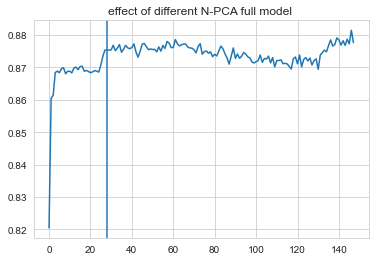

In [284]:
plt.plot(AUC_DIFF_PCA)
plt.axvline(28)
plt.title("effect of different N-PCA full model ")
plt.show

## Test different Number of pca features on Velocity, Acceleration and coordinates.



In [154]:
#get index
#Vel
indx_start_vel = X_pd_data.columns.get_loc('v002') 
indx_end_vel = X_pd_data.columns.get_loc('v101')
#acc
indx_start_acc = X_pd_data.columns.get_loc('a002') 
indx_end_acc = X_pd_data.columns.get_loc('a101')
#Coord
indx_start_coord = X_pd_data.columns.get_loc('x001') 
indx_end_coord = X_pd_data.columns.get_loc('y101')


#get X_vel X_acc and Coord
X_vel = X[:, indx_start_vel:indx_end_vel] 
X_acc = X[:, indx_start_acc:indx_end_acc]
X_coord = X[:, indx_start_coord:indx_end_coord]

In [148]:
n_pca_vel = n_pca_try(X_vel, y, 80)
n_pca_acc = n_pca_try(X_acc, y, 80)
n_pca_coord = n_pca_try(X_coord,y , 80)

#VEl ACC
X_vel_acc = np.concatenate((X_vel,X_acc),axis=1)

n_pca_vel_acc = n_pca_try(X_vel_acc, y , 80)

0.8232061900524815
0.8233779667156084
0.8235044419136683
0.821841586714325
0.8229794598734745
0.8221532796169899
0.8290733361701745
0.8270584644655037
0.828891455053714
0.827719126134318
0.8277684566598863
0.8276457245427219
0.8273425263820968
0.8269390665453502
0.8265787284160719
0.8259475513402735
0.8268814206127788
0.8264357405260169
0.8260528061820566
0.8264956054307815
0.8252172579414575
0.8240648509926697
0.8239639771862878
0.8238330903463137
0.8223845046493684
0.8213161570538784
0.8199528018875801
0.8229743758447279
0.8229799758801548
0.8236584314104695
0.8218235556523487
0.8230765360811094
0.8201939549076156
0.8221946596225778
0.8209046333574073
0.820171286480692
0.82072724087737
0.8187156359397362
0.8192016491936952
0.8180692282979021
0.8207460705780452
0.8193825595098214
0.820418385294106
0.8201637142380829
0.8191376241942955
0.8179035753285108
0.8185437550231744
0.8181772300742274
0.8185628883978456
0.8193331529461974
0.8180895414580043
0.8174183444535403
0.8171028544303549


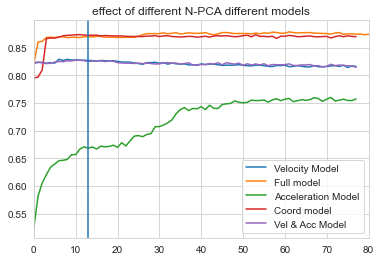

In [285]:
plt.plot(n_pca_vel, label = "Velocity Model")
plt.plot(AUC_DIFF_PCA, label = "Full model")
plt.plot(n_pca_acc, label = "Acceleration Model")
plt.plot(n_pca_coord, label = "Coord model")
plt.plot(n_pca_vel_acc, label = "Vel & Acc Model")
plt.axvline(13)
plt.xlim(0, 80)
plt.title("effect of different N-PCA different models")
plt.legend()
plt.show()

In [286]:
y_2 = np.zeros(shape = len(y))
for i in range(len(y)):
    if y[i] == "Central": #Central = STRAIGHT = NOT DEVIATED / CONTROL
        y_2[i] = 0
    else: 
        y_2[i] = 1


## Create the ROC curve 

Creating ROC curves for validation/calibration data with all features included. 

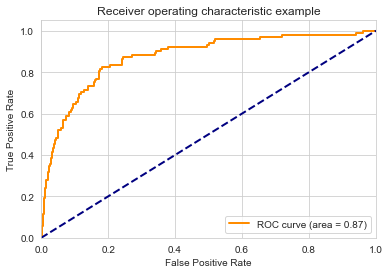

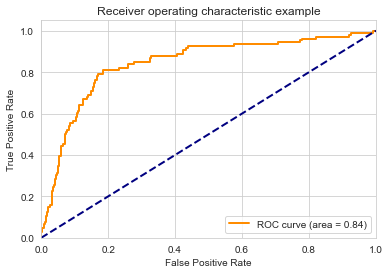

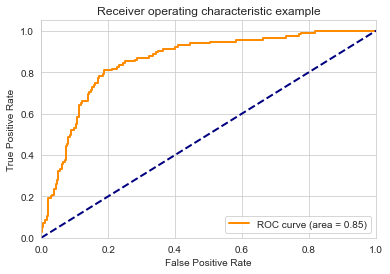

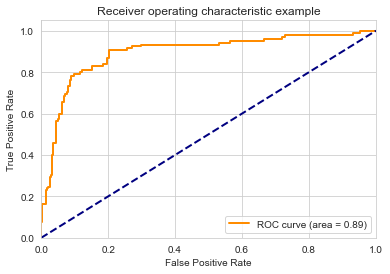

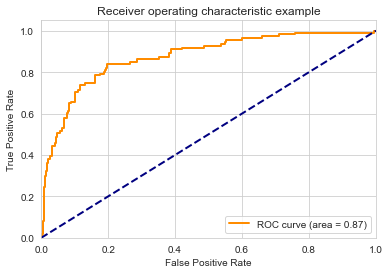

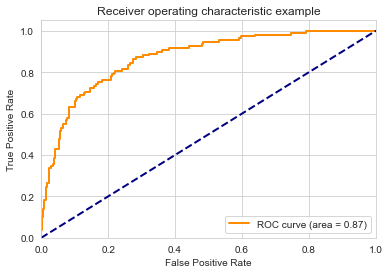

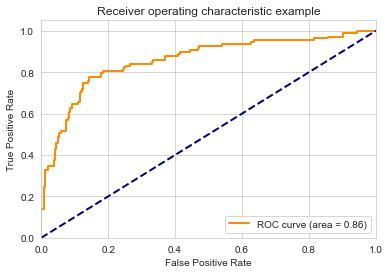

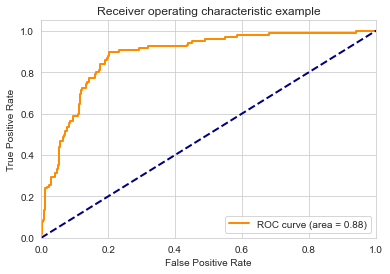

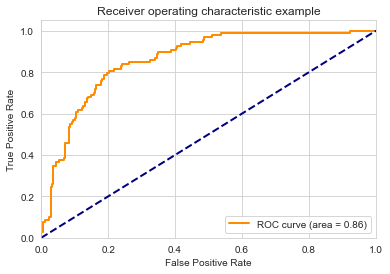

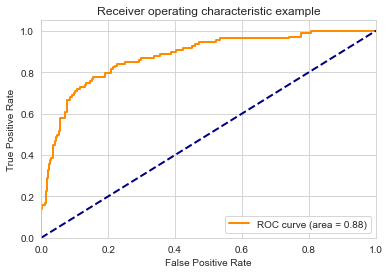

In [330]:
lda = LinearDiscriminantAnalysis()
kf = KFold(n_splits= 10, shuffle= True)


for train, test in kf.split(X_pca):
    lda.fit(X_pca[train,:], y_2[train])
    y_score_lda1 = lda.decision_function(X_pca[test,:])
    fpr, tpr, _ = roc_curve(y_2[test], y_score_lda1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,
        color="darkorange",lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

## Replicating Test of Calibration on Negation. 

In [253]:
negation_data = pd.read_csv("R 2 sigurd/Sigurd_Negation_PCA_data.csv")
#filter for true
negation_data_true = negation_data[negation_data["Response"] == True]


In [270]:
#Get X
negation_X_start = negation_data_true.columns.get_loc('x001') 
X_negation_true = negation_data_true.iloc[:,negation_X_start:410].values


#std
sc = StandardScaler()
sc.fit(X)
X_negation_std = sc.transform(X_negation_true)

#pca 
pca_model = PCA(n_components= 13)
pca_model.fit(X_std)
X_negation_pca = pca_model.transform(X_negation_std)


#Get Y
Y_negation_true = negation_data_true.iloc[:,3].values

#turn y numeric 0 = Not deviated,  1 = deviated. 
y_negation_true_2 = np.zeros(shape = len(Y_negation_true))
for i in range(len(Y_negation_true)):
    if Y_negation_true[i] == "P": #Central = STRAIGHT = NOT DEVIATED / CONTROL
        y_negation_true_2[i] = 0
    else: 
        y_negation_true_2[i] = 1

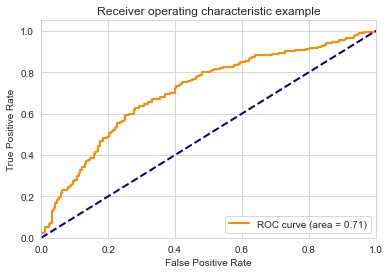

0.7074486599373477


In [274]:



## Getting ROC curve for negation

lda = LinearDiscriminantAnalysis()

lda.fit(X_pca, y_2)
y_score_lda1 = lda.decision_function(X_negation_pca)
fpr, tpr, _ = roc_curve(y_negation_true_2, y_score_lda1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr,tpr,
    color="darkorange",lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

#AUC SCORE for ROC curve
print(roc_auc_score(y_negation_true_2, y_score_lda1))

## ISSUE OF THEM NOT HAVING STANDARDIZED THEIR VELOCITY AND ACCELERATION values.  (FIXED) 
All variables need's to be standardized and normalized when doing PCA. 

I will now proceed by doing exactly that followed up with another evaluation of the AUC score. 

# **Testing their lda and pca model on our spivey replication data.** 

In [367]:
#Load data and prepare

spivey_data = pd.read_csv("R 2 sigurd/spivey_data_for_pca.csv")

#X
X_spivey = spivey_data.iloc[:,4:407]
X_spivey['a101'] = 0
X_spivey_ndarray = X_spivey.values


#std
sc = StandardScaler()
sc.fit(X) #FIT STANDARDIZER ON X(CALIBRATION DATA) or Spivey_data(Our data). fit() on X performs better. 
X_spivey_std = sc.transform(X_spivey)

#pca 
pca_model = PCA(n_components= 13)
pca_model.fit(X_std)
X_spivey_pca = pca_model.transform(X_spivey_std)



/Users/sigurd/opt/anaconda3/envs/method3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [304]:
#Y find Polarity. 
y_spivey = spivey_data.iloc[:,2]
#Prepare array.
y_spivey2 = np.zeros(shape = len(y_spivey))

# Y as numeric. 1 = devitation/cohort,   0 = No Deviation/Control
for i in range(len(y_spivey)):
    if y_spivey[i] == "cohort":
        y_spivey2[i] = 1
    else: 
        y_spivey2[i] = 0


In [329]:
# LDA Fit on Calibration test on Spivey

#fit 
lda = LinearDiscriminantAnalysis()
lda.fit(X_pca, y_2)

#predict on Spivey data 
lda.predict(X_spivey_pca)
lda.score(X_spivey_pca, y_spivey2)

#get lda values. 
spivey_data["lda_value"] = lda.transform(X_spivey_pca)


0.533256880733945

In [327]:
# Find mean lda_value with se for both Polarities. 
from scipy.stats import sem

d = {'means': [spivey_data.loc[spivey_data["Polarity"] == "control", "lda_value"].mean(), spivey_data.loc[spivey_data["Polarity"] != "control", "lda_value"].mean()], 
    "se": [sem(spivey_data.loc[spivey_data["Polarity"] == "control", "lda_value"]) ,sem(spivey_data.loc[spivey_data["Polarity"] != "control", "lda_value"])] }

pd.DataFrame(data = d)



,means,se
0,-3.316031,0.113132
1,-3.446622,0.124432


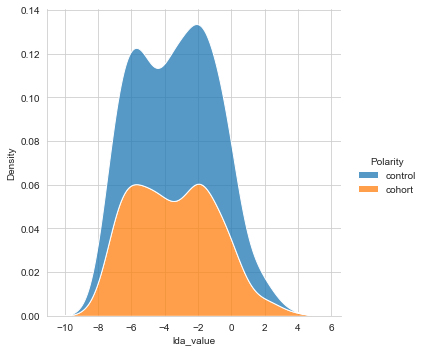

In [328]:
import seaborn as sns

sns.set_style('whitegrid')
sns.displot(spivey_data, x = "lda_value", hue = "Polarity", kind = "kde", multiple = "stack")



In [310]:
y_score_lda = lda.fit(X_pca, y_2).decision_function(X_spivey_pca) #fit on validation data # test on Spivey data

In [372]:
roc_auc_score(y_spivey2, y_score_lda)

0.48198693418465505

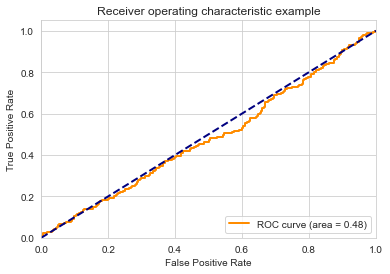

In [312]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_pca, y_2)
y_score_lda1 = lda.decision_function(X_spivey_pca)
fpr, tpr, _ = roc_curve(y_spivey2, y_score_lda1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr,tpr,
    color="darkorange",lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## How does different feature combinations perform on our model. 
Fitted and tested on our own data. 

In [356]:
#get index
#Vel
indx_start_vel = spivey_data.columns.get_loc('v002') 
indx_end_vel = spivey_data.columns.get_loc('v101')
#acc
indx_start_acc = spivey_data.columns.get_loc('a002') 
indx_end_acc = spivey_data.columns.get_loc('a101')
#Coord
indx_start_coord = spivey_data.columns.get_loc('x001') 
indx_end_coord = spivey_data.columns.get_loc('y101')


#get X_vel X_acc and Coord
X_vel_spivey = spivey_data.iloc[:, indx_start_vel:indx_end_vel].values 

X_acc_spivey = spivey_data.iloc[:, indx_start_acc:indx_end_acc].values

X_coord_spivey = spivey_data.iloc[:, indx_start_coord:indx_end_coord].values

X_vel_acc = np.concatenate((X_vel_spivey,X_acc_spivey),axis=1)

In [364]:
X_vel_acc_list = n_pca_try(X_vel_acc, y_spivey2, 80)

X_vel_list = n_pca_try(X_vel_spivey, y_spivey2, 80)

X_acc_list = n_pca_try(X_acc_spivey, y_spivey2, 80)

X_coord_list = n_pca_try(X_coord_spivey, y_spivey2, 80)

X_all_list = n_pca_try(X_spivey_ndarray, y_spivey2, 80)

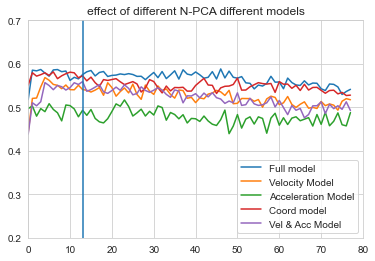

In [371]:
plt.plot(X_all_list, label = "Full model")
plt.plot(X_vel_list, label = "Velocity Model")
plt.plot(X_acc_list, label = "Acceleration Model")
plt.plot(X_coord_list, label = "Coord model")
plt.plot(X_vel_acc_list, label = "Vel & Acc Model")
plt.axvline(13)
plt.xlim(0, 80)
plt.title("effect of different N-PCA different models")
plt.legend()
plt.ylim(0.20,0.70)
plt.show()